In [2]:
# required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Assuming that 'data.xlsx' is the file name.
df = pd.read_excel('/Users/enamul/Desktop/Data Science Projects/Customer Segmentation/data/online_retail_II.xlsx', engine='openpyxl')

In [4]:
# Basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None
            Quantity                    InvoiceDate          Price  \
count  525461.000000                         525461  525461.000000   
mean       10.337667  2010-06-28 11:37:36.845017856       4.688834   
min     -9600.000000            2009-12-01 07:45:00  -53594.360000   
25%         1.000000   

In [5]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (drop null values)
df.dropna(inplace=True)
df.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

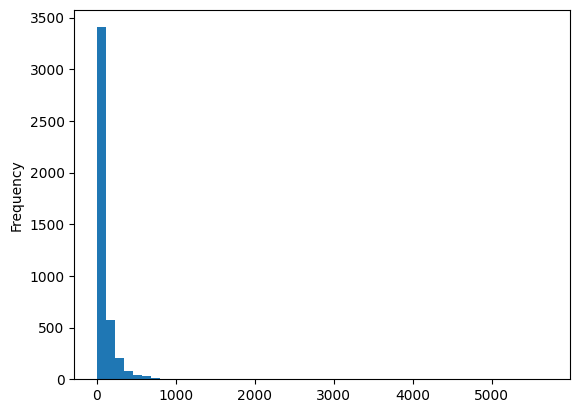

In [6]:
# Count of transactions by customer
df['Customer ID'].value_counts().plot(kind='hist', bins=50)
plt.show()

In [7]:
# check duplicates
df[df.duplicated()].shape

# Drop duplicated data
df = df.drop_duplicates(keep='first')
df.shape

(410763, 8)

In [9]:
# Checcking the statsitic of numeric features
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,410763.0,12.923735,-9360.0,2.0,5.0,12.0,19152.0,102.03955
InvoiceDate,410763,2010-06-30 19:56:14.853674752,2009-12-01 07:45:00,2010-03-26 09:46:00,2010-07-08 15:09:00,2010-10-14 12:32:00,2010-12-09 20:01:00,NaN
Price,410763.0,3.908358,0.0,1.25,1.95,3.75,25111.09,71.714794
Customer ID,410763.0,15353.621857,12346.0,13979.0,15311.0,16797.0,18287.0,1681.657665


In [10]:
# checking the price column which has a value of 0
df[df['Price']==0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom
16107,490727,M,Manual,1,2009-12-07 16:38:00,0.0,17231.0,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.0,15070.0,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.0,18071.0,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.0,14258.0,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.0,12417.0,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.0,16858.0,United Kingdom


In [11]:
# Remove rows that Price have 0 value from the dataset
df = df[df['Price']>0]
df.shape

(410732, 8)

In [12]:
# checking total order in dataset
df['Invoice'].nunique()

23585

In [13]:
# checking number of customer
df['Customer ID'].nunique()

4381

In [14]:
# Checking the number of Quantity sold
df['Quantity'].sum()

5307722

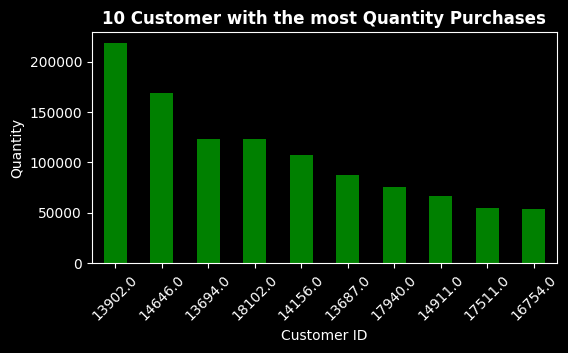

In [16]:
# 10 Customer with the most Quantity Purchases
plt.style.use('dark_background')
df.groupby('Customer ID')['Quantity'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='g', figsize=(6,3))
plt.xlabel('Customer ID')
plt.ylabel('Quantity')
plt.title('10 Customer with the most Quantity Purchases', fontweight='bold')
plt.xticks(rotation=45)
plt.show()

In [19]:
# save clean data
df.to_csv('/Users/enamul/Desktop/Data Science Projects/Customer Segmentation/data/online_retail_clean_data.csv', index=False)
